# Random Forest
Use supervised learning, Random Forest, to predict the ratings based on the users demographic and the movie genre.

In [1]:
# Load all packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Load the data

In [8]:
ratings = pd.read_csv('D:\Jupyter_Notebook\Movie_Recommendation_System\data\\ratings_featured.csv')
users = pd.read_csv('D:\Jupyter_Notebook\Movie_Recommendation_System\data\\users_featured.csv')
movies = pd.read_csv('D:\Jupyter_Notebook\Movie_Recommendation_System\data\\movies_featured.csv') 

In [9]:
users.head()

,user_id,gender,age,occupation,zipcode
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


In [10]:
movies.head()

,movie_id,title,genres,War,Comedy,Musical,Thriller,Sci-Fi,Fantasy,Drama,...,Animation,Mystery,Western,Crime,Adventure,Documentary,Film-Noir,Horror,Romance,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,Grumpier Old Men (1995),Comedy|Romance,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ratings.head()

,user_id,movie_id,rating,datetime
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [12]:
df = pd.merge(pd.merge(movies, ratings,on='movie_id'),users,on='user_id')

In [13]:
df.head()

,movie_id,title,genres,War,Comedy,Musical,Thriller,Sci-Fi,Fantasy,Drama,...,Horror,Romance,Children's,user_id,rating,datetime,gender,age,occupation,zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,0,1,0,0,0,0,0,...,0,0,1,1,5,2001-01-06 23:37:48,0,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,0,0,1,0,0,0,0,...,0,1,1,1,5,2001-01-06 23:39:11,0,1,10,48067
2,150,Apollo 13 (1995),Drama,0,0,0,0,0,0,1,...,0,0,0,1,5,2000-12-31 22:29:37,0,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,0,0,0,0,1,1,0,...,0,0,0,1,4,2000-12-31 22:12:40,0,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,0,0,0,0,0,1,...,0,0,0,1,5,2001-01-06 23:36:35,0,1,10,48067


## Building the model

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

In [25]:
X = df.drop(columns=['rating','movie_id','title','genres','user_id','datetime','zipcode'])
y = df['rating']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [27]:
# Use GridSearchCV to tune the hyperparameter
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=1)
param = {'n_estimators':[10,30,50,100,150,200,300]}
gs = GridSearchCV(rf,param,cv=5,scoring='accuracy',n_jobs=-1)
gs_fit = gs.fit(X_train, y_train)

In [28]:
gs_fit.best_params_

{'n_estimators': 300}

In [29]:
gs_fit.best_score_

0.35102422479925666

In [30]:
print(accuracy_score(y_test, gs_fit.predict(X_test)))

0.3545205506843563


The performance of predicting the rating is not so good. I will try the other way. I will recommend the movie to users if the user ratess 4 or 5, and will not recommend the movie if the user rate equal or below 3. Label ratings above 3 as 1 (recommend), and label ratings equal or below 3 as 0 (not recommend).

In [36]:
y1 = y.replace({5:1,4:1,3:0,2:0,1:0})

In [41]:
# Check the number of 
y1.value_counts()

1    575281
0    424928
Name: rating, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=.2, random_state=1)

In [43]:
# Use GridSearchCV to tune the hyperparameter
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=1)
param = {'n_estimators':[10,30,50,100,150,200,300]}
gs = GridSearchCV(rf,param,cv=5,scoring='accuracy',n_jobs=-1)
gs_fit = gs.fit(X_train1, y_train1)

In [44]:
gs_fit.best_params_

{'n_estimators': 300}

In [45]:
gs_fit.best_score_

0.6118222821121546

In [48]:
print(accuracy_score(y_test1, gs_fit.predict(X_test1)))

0.6148358844642625


## Model and Analysis

In [49]:
rf = RandomForestClassifier(n_estimators=300,random_state=1)
model_res = rf.fit(X_train1, y_train1)
y_pred = model_res.predict(X_test1)
print('accuracy_score: ',accuracy_score(y_test1, y_pred))

accuracy_score:  0.6148358844642625


In [50]:
print("Classification Report")
print(classification_report(y_test1, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.37      0.45     84972
           1       0.63      0.80      0.70    115070

    accuracy                           0.61    200042
   macro avg       0.60      0.58      0.58    200042
weighted avg       0.61      0.61      0.60    200042



Confusion matrix, without normalization
[[31481 53491]
 [23558 91512]]
Normalized confusion matrix
[[0.37 0.63]
 [0.2  0.8 ]]


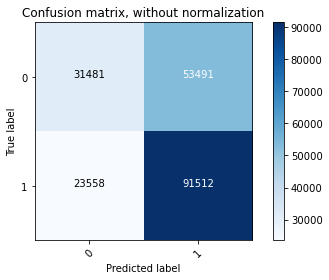

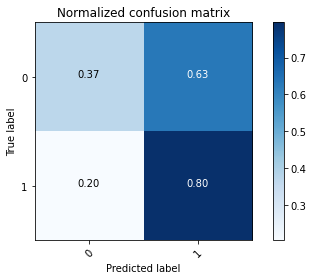

In [51]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Program Files\Anaconda\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


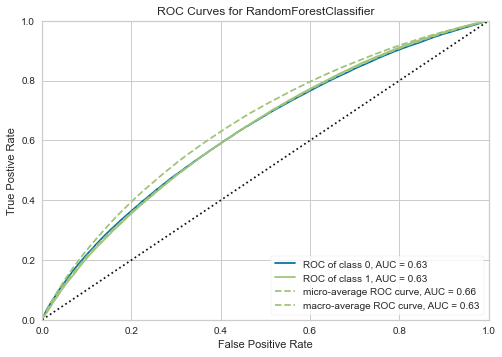

In [53]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model_res, classes=["0", "1"])

visualizer.fit(X_train1, y_train1)        # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and show the figure